### Visualizing Kannada MNIST with PCA and t-SNE:

In this lab, we will use the famous MNIST dataset, which contains 784 dimensional 

### Data Description

The data files contain gray-scale images of hand-drawn digits, from zero through nine, in the Kannada script.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, has 785 columns. The first column, called label, is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixel{x}, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixel{x} is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

       ... 
       
728 729 730 731 ... 754 755

756 757 758 759 ... 782 783 

The test data set,is the same as the training set, except that it does not contain the label column.

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

#### You can find the dataset on Canvas:
mnist_train and mnist_test

##### Loading the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

# TSNE
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Loading and Reading the data

In [ ]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print(train.shape)
print(test.shape)

(60000, 785)
(5000, 785)


Setting the label and the feature columns

In [3]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(60000, 784)
[0 1 2 ... 7 8 9]


In [4]:
## Plotting the original train data

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

Standardizing the data

In [5]:
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


# PCA

### Idea behind PCA:
1- Identify a Hyperplane that lies closest to the data.

2- Project the data onto the hyperplane.

#### 1. PCA for Visualisation

An effective way to visualize high-dimensional data is to represent each data object by a two-dimensional point in such a way that similar objects are represented by nearby points, and that dissimilar objects are represented by distant points. The resulting two-dimensional points can be visualized in a scatter plot. This leads to a map of the data that reveals the underlying structure of the objects, such as the presence of clusters.

#### (1) project from 784 to 2 dimensions

In [6]:
## Importing and Apply PCA with 2 components
pca = PCA(n_components=2)  #project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print (principal_df.shape)
## Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

## Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

(60000, 2)
Explained variation per principal component: [0.07972071 0.05570993]


Text(823.3435270132519, 0.5, 'Principal Component 2')

#### (2) project from 784 to 4 dimensions

In [7]:
## Importing and Apply PCA with 2 components
no_comp = 4
pca = PCA(n_components=no_comp) 
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
print (principal_df.shape)
## Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

## Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 3], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component %d'% no_comp)

(60000, 4)
Explained variation per principal component: [0.07972071 0.05570993 0.04466606 0.03657989]


Text(823.3435270132519, 0.5, 'Principal Component 4')

The full data is a 784-dimensional point cloud, and these colored points are the projection of each data point along the directions with the largest variance.

This representation makes it possible for us to see the layout of the digits in two dimensions. Another important thing to note here is that we have achieved this in an unsupervised manner—that is, without reference to the labels.

### Choosing the right number of components

The thumb rule is to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%). However, if your goal is to visualise the dataset then make sure not to choose more than 2 or 3 dimensions, since the goal then would be to reduce the dimensions.

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x)

You could also plot the explained variance as a function of the number of dimensions. There will an elbow in the curve, where the explained variance stops growing fast.

In [9]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### 2. PCA for for Noise Filtering

PCA can also be used to filter unwanted noise from the data. The idea behind this concept is that components which have variance higher than that of noise should remain reasonably affected by noise. Thus if we reconstruct the data with only the largest group of principal components, we can easily filter out the noise from our data

In [10]:
## Introducing some random noise

np.random.seed(42)
noisy = np.random.normal(x, 10)
plot_digits(noisy)

In [11]:
## Training a PCA on noisy data and letting the projection preserve 50% of the variance:

pca = PCA(0.50).fit(noisy)
pca.n_components_

np.int64(24)

Here 50% of the variance amounts to 24 principal components. Now we compute these components, 
and then use the inverse of the transform to reconstruct the filtered digits:

In [12]:
#using the inverse of the transform to reconstruct the filtered digits:

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# t-SNE

t-SNE or T-distributed stochastic neighbour embedding takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.

#### t-SNE is consumes a lot of memory so we will use only a subset of our dataset. 

In [13]:
x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


Applyting t-SNE on the data

#### with perplexity=40

In [14]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 2.15 μs


Here is a brief explanation of the parameter.

* n_components (default: 2): Dimension of the embedded space.
* verbose (default: 0) : Verbosity level.
* perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
* n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.

There are other parameters which can be tunes. refer to the documentation https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for detailed info.

#### Visualizing the t-SNE¶


In [15]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24)

Text(0.5, 1.0, 'Visualizing Kannada MNIST through t-SNE')

##### with perplexity=5

In [16]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=5).fit_transform(x_subset)

CPU times: user 4 μs, sys: 12 μs, total: 16 μs
Wall time: 4.29 μs


An important point to note here is that t-SNE is computationally expensive, hence it is mentioned in its documentation that :

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

##### Using PCA to reduce dimensions of data before feeding to t-SNE algorithm¶


In [17]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [18]:
# Using the output of PCA as input for t-SNE
%time
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 5 μs, sys: 27 μs, total: 32 μs
Wall time: 4.77 μs


        Note: The time taken for the algorithm to run has been considerably reduced.



In [19]:
#visualising t-SNE again 

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

### Visualising TSNE in 3D
Let's try and visualise the output as a 3D scatter plot:

In [20]:
%time
pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 4 μs, sys: 3 μs, total: 7 μs
Wall time: 2.86 μs


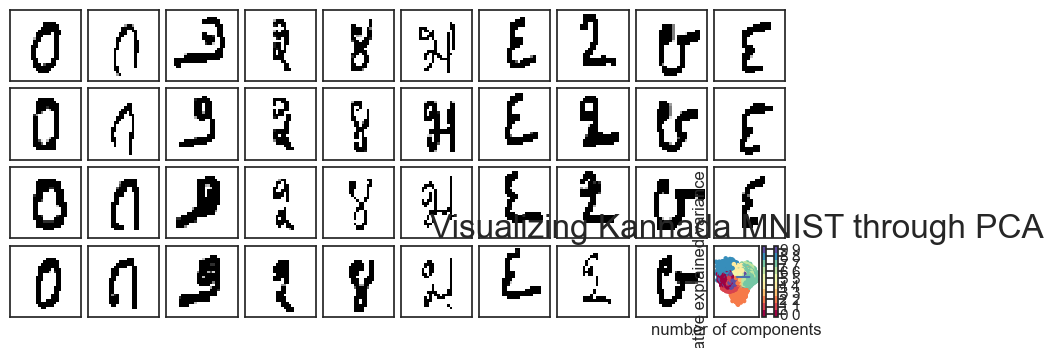

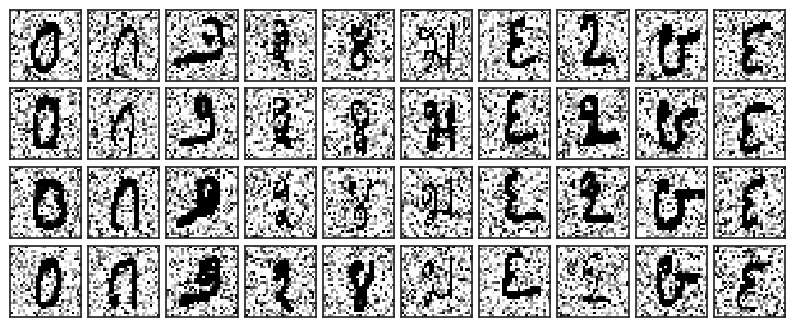

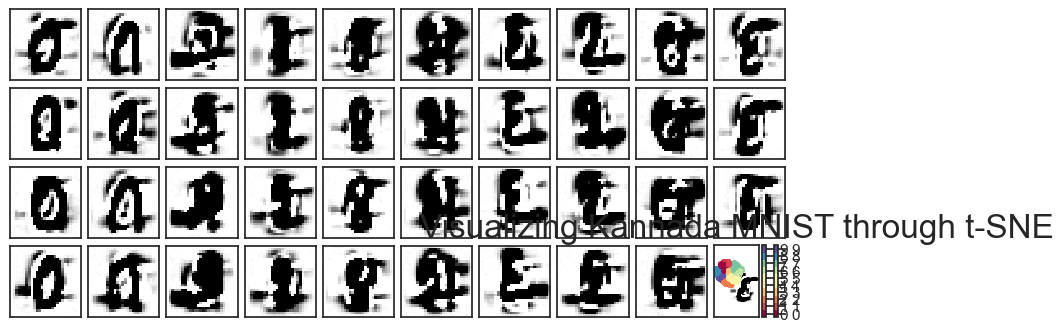

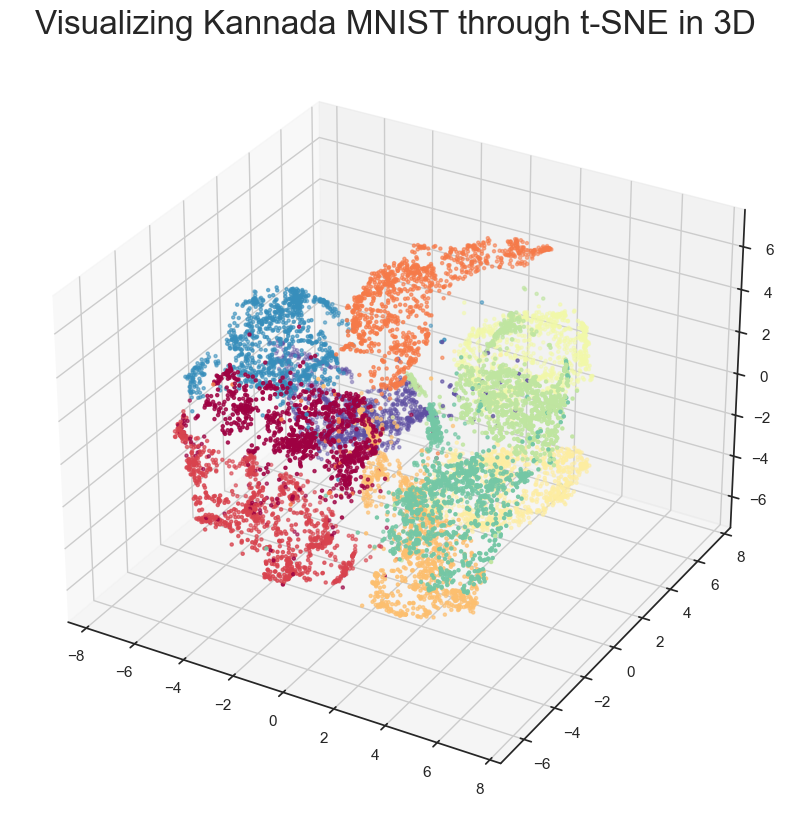

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y_subset, cmap='Spectral')
plt.title('Visualizing Kannada MNIST through t-SNE in 3D', fontsize=24);
plt.show()

### Comparison of the PCA and the t-SNE technique on the same dataset

we can see t-SNE does a better job as compared to PCA when it comes to visualising High Dimensional datasets.Similar digits are clustered together. If we were to use a clutering algorithm on this output, we can easily assign labels to unseen test data.